In [70]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.metrics import silhouette_score

In [34]:
df=pd.read_csv('ifood_df.csv')

Data Preparation and Cleaning

Reviewing data columns and comparing them to the dataset description

Looking for missing values

Checking column types

Assessing unique values

In [35]:
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [36]:
df.shape

(2205, 39)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [39]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [40]:
df['Z_Revenue'].nunique()

1

In [41]:
df['Z_CostContact'].nunique()

1

Columns Z_CostContact and Z_Revenue have all the same values. These columns will not help us to understand our customers better. We can drop these columns from the data frame.

In [42]:
df.drop(columns=['Z_CostContact','Z_Revenue'])

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


Data Exploration


Box plot for the total amount spent on all products (MntTotal)

Outliers

Box plot and histogram for income

Histogram for age

Correlation matrix

Point-Biserial correlations for binary variables

Box plot for the total amount spent on all products (MntTotal)

Our analysis will be focused on total amount spent on all products (MntTotal). Boxplot will help us to find outliers if any.

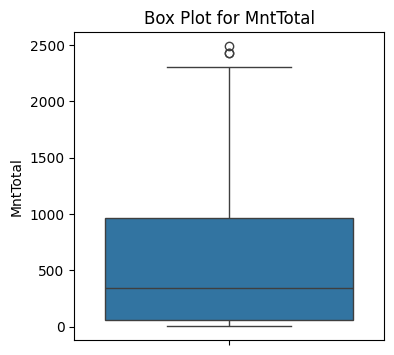

In [43]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df , y='MntTotal')
plt.title('Box Plot for MntTotal')
plt.ylabel('MntTotal')
plt.show()

Outlier Detection

In [44]:
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['MntTotal'] < lower_bound) | (df['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,...,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,...,0,0,0,0,0,1,0,2429,2333,1


In [46]:
data = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


BoxPlot and Histogram for Income

<ipython-input-47-4435b5fc63f0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Income', palette='viridis')


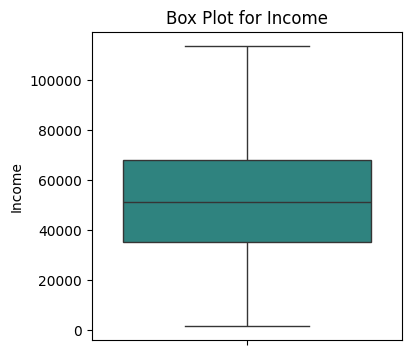

In [47]:
plt.figure(figsize=(4,4))
sns.boxplot(data=df, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

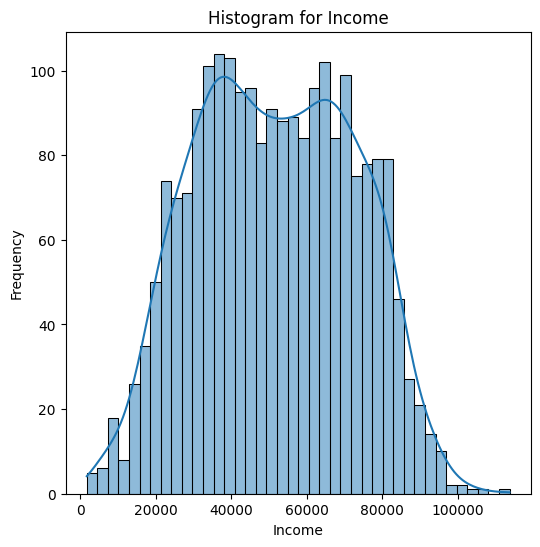

In [48]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='Income', bins=40, kde=True)
plt.title('Histogram for Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

#Income distribution is close to normal distribution with no outliers.

#Histogram for age

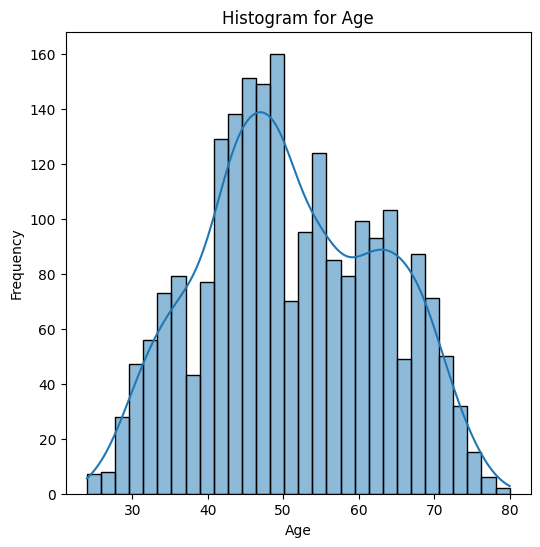

In [49]:
plt.figure(figsize=(6,6))
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#Correlation matrix


There are many columns in the data. The correlation matrix will be very crowded if we use all columns of the data frame. We will group the columns and explore correlation between columns in each group and the column 'MntTotal'. We will focus on the column 'MntTotal' to understand how we can segment the customers who buy the most in overall. We can run similar analysis for every type of product.

In [50]:
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

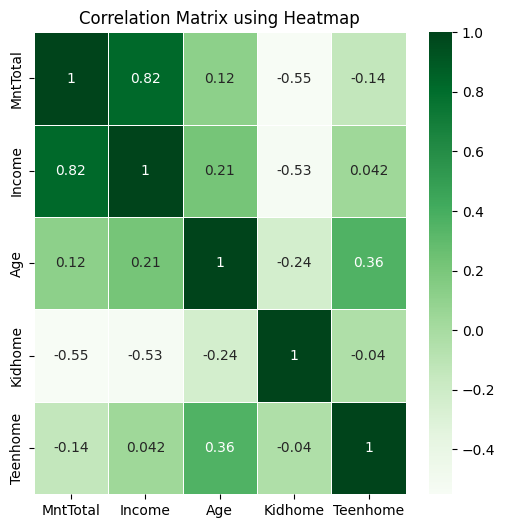

In [51]:
corr_matrix = df[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', linewidths=0.5)
plt.title('Correlation Matrix using Heatmap')
plt.show()

#MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome.
Income feature has nearly the same negative correlation with Kidhome and MntTotal.

#Point-Biserial correlations for binary variables
#Pearson correlation measures the strength and direction of a linear relationship between two continuous variables.
We used Pearson correlation for MntTotal, Age and Income. When we try to understand the relationship between a continuous variable MntTotal and binary variables like marital status then we should use Point-Biserial Correlation Point-Biserial Correlation is used to measure the strength and direction of the linear relationship between a binary variable and a continuous variable.

In [52]:
for i in cols_marital:
    correlation, p_value = pointbiserialr(df[i], df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {i} with p-value {p_value:.4f}')

0.0037: Point-Biserial Correlation for marital_Divorced with p-value 0.8612
-0.0223: Point-Biserial Correlation for marital_Married with p-value 0.2963
0.0059: Point-Biserial Correlation for marital_Single with p-value 0.7804
0.0016: Point-Biserial Correlation for marital_Together with p-value 0.9393
0.0359: Point-Biserial Correlation for marital_Widow with p-value 0.0921


There is no strong Point-Biserial correlation between MntTotal and different marital statuses. Some feature engineering may be required during the modelling process.

In [53]:
for i in cols_education:
    correlation, p_value = pointbiserialr(df[i], df['MntTotal'])
    print(f'{correlation:.4f}: Point-Biserial Correlation for {i} with p-value {p_value:.4f}')

-0.0603: Point-Biserial Correlation for education_2n Cycle with p-value 0.0046
-0.1386: Point-Biserial Correlation for education_Basic with p-value 0.0000
0.0143: Point-Biserial Correlation for education_Graduation with p-value 0.5012
0.0064: Point-Biserial Correlation for education_Master with p-value 0.7653
0.0708: Point-Biserial Correlation for education_PhD with p-value 0.0009


There is no strong Point-Biserial correlation between MntTotal and various education levels.

In [54]:
print("Skewness: %f" % data['Age'].skew())
print("Kurtosis: %f" % data['Age'].kurt())

Skewness: 0.091227
Kurtosis: -0.796125


The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. Skewness of 0.09 (close to zero) supports the visual observation of the distribution. Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution

#Feature Engineering

#New feature: Marital

The data frame contains 5 columns to reflect marital status. We are going to create a new column 'marital' with values: Divorced, Married, Single, Together, Widow. This column will allow us to draw some additional plots.

In [55]:
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
data['Marital'] = data.apply(get_marital_status, axis=1)

<ipython-input-55-c83f4498a3e0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital'] = data.apply(get_marital_status, axis=1)


<ipython-input-56-09fd96024c37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')


Text(0, 0.5, 'MntTotal')

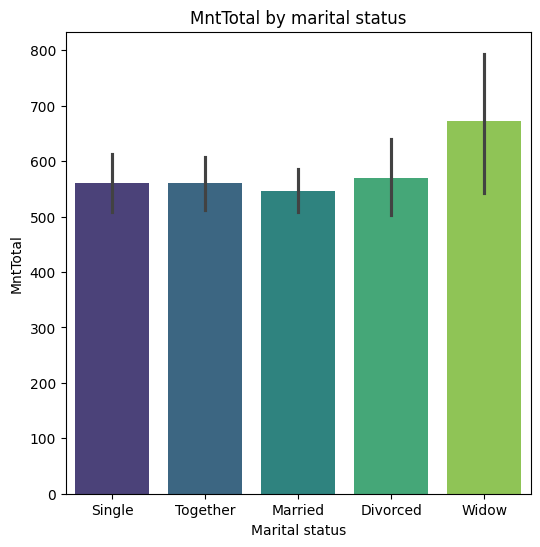

In [56]:
plt.figure(figsize=(6,6))
sns.barplot(x='Marital', y='MntTotal', data=data, palette='viridis')
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')

#New feature: In_relationship

There are 3 features that reflect if a person is single (Single, Divorced, Widow) and 2 features if a person is in relationship (Together, Married). We will add an additional feature 'In_relationship'. This feature will equal 1 if a customer's marital status is 'Married' or 'Together' and 0 in all other cases.

In [57]:
def get_relationship(row):
    if row['marital_Married'] ==1:
        return 1
    elif row['marital_Together'] == 1:
        return 1
    else:
        return 0
df['In_relationship'] = df.apply(get_relationship, axis=1)
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,1,0,0,1529,1441,0,Single
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,1,0,0,21,15,0,Single
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,0,0,1,0,0,734,692,0,Together
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,0,0,1,0,0,48,43,0,Together
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,1,407,392,0,Married


#K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm used to cluster data based on similarity. K-means clustering usually works well in practice and scales well to the large datasets.

In this section:

Standardising data

Principal Component Analysis (PCA)

Elbow method

Silhouette score analysis

#Standardising data

K-means clustering algorithm is based on the calculation of distances between data points to form clusters. When features have different scales, features with larger scales can disproportionately influence the distance calculation. There are various ways to standardise features, we will use standard scaling .

In [64]:
# Initialize StandardScaler
sc = StandardScaler()
# Specify columns for scaling
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']
# Create a copy of the DataFrame for scaled data
data_scaled = df.copy()
# Apply StandardScaler to selected columns
for col in cols_for_clustering:
    data_scaled[col] = (data_scaled[col] - data_scaled[col].mean()) / data_scaled[col].std()


In [65]:
# Describe the scaled data
data_scaled[cols_for_clustering].describe()

,Income,MntTotal,In_relationship
count,2.205000e+03,2.205000e+03,2.205000e+03
mean,9.667248e-18,-3.866899e-17,8.539402e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.408726e+00,-9.701837e-01,-1.347319e+00
25%,-7.930307e-01,-8.798961e-01,-1.347319e+00
50%,-1.617794e-02,-3.815776e-01,7.418782e-01
75%,8.042705e-01,6.966655e-01,7.418782e-01
max,2.998683e+00,3.347998e+00,7.418782e-01


The mean value for all colums is almost zero and the standard deviation is almost 1. All the data points were replaced by their Z-scores

#Principal Component Analysis (PCA)

PCA is a technique of dimensionality reduction. PCA takes the original features (dimensions) and create new features that capture the most variance of the data.

In [67]:
pca = decomposition.PCA(n_components = 2)
pca_res = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

#Elbow method
The elbow method is a technique used to determine the optimal number of clusters (K) for K-means clustering algorithm.

In [68]:
X = data_scaled[cols_for_clustering]
inertia_list = []
for K in range(2,10):
    inertia = KMeans(n_clusters=K, random_state=7).fit(X).inertia_
    inertia_list.append(inertia)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

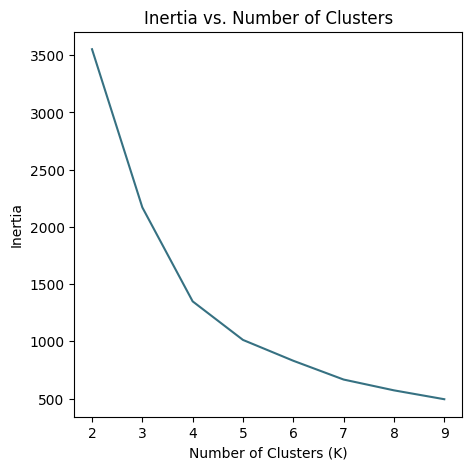

In [74]:
plt.figure(figsize=[5,5])
plt.plot(range(2,10), inertia_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Inertia vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

Elbow method suggests 4 or 5 clusters. Let's check silhouette score.

#Silhouette score analysis
Silhouette score is a metric that used to assess the quality of clustering. A higher silhouette score indicates that the clusters are well-separated, while a lower score suggests that the clusters may overlap or are poorly defined.

In [71]:
silhouette_list = []
for K in range(2,10):
    model = KMeans(n_clusters = K, random_state=7)
    clusters = model.fit_predict(X)
    s_avg = silhouette_score(X, clusters)
    silhouette_list.append(s_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

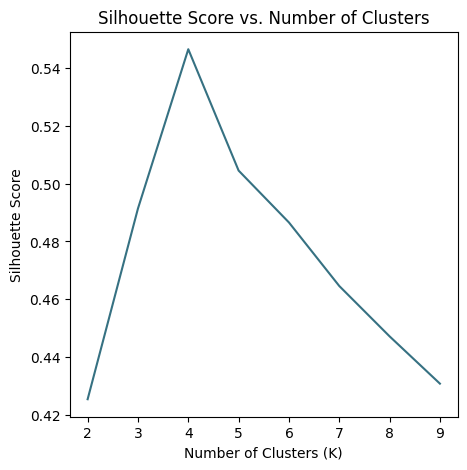

In [73]:
plt.figure(figsize=[5,5])
plt.plot(range(2,10), silhouette_list, color=(54 / 255, 113 / 255, 130 / 255))
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

The highest silhouette score is for 4 clusters.

In [75]:
model = KMeans(n_clusters=4, random_state = 7)
model.fit(data_scaled[cols_for_clustering])
data_scaled['Cluster'] = model.predict(data_scaled[cols_for_clustering])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#Exploration of Clusters
In this section:

Visualisation of clusters

Mean consumption of different product types by cluster

Cluster sizes

Income by cluster

In_relationship feature by cluster

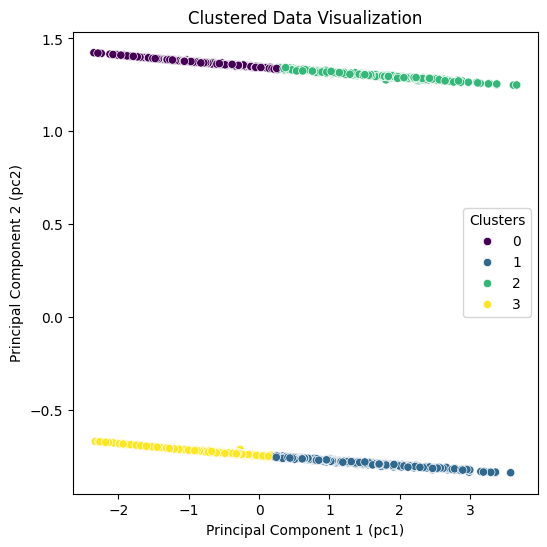

In [76]:
#Visualisation of clusters

plt.figure(figsize=(6,6))
sns.scatterplot(x='pc1', y='pc2', data=data_scaled, hue='Cluster', palette='viridis')
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1 (pc1)')
plt.ylabel('Principal Component 2 (pc2)')
plt.legend(title='Clusters')

In [78]:
df['Cluster'] = data_scaled.Cluster
df.groupby('Cluster')[cols_for_clustering].mean()

,Income,MntTotal,In_relationship
Cluster,,,
0,37332.339956,150.761589,0.0
1,71865.747350,1150.915194,1.0
2,72059.439394,1167.306061,0.0
3,37920.024533,158.845794,1.0


Mean consumption of different product types by cluster

In [79]:
mean_data = df.groupby('Cluster')[cols_mnt].mean().reset_index()
mean_data.head()

,Cluster,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,150.761589,125.662252,85.450331,7.832230,38.774834,10.971302,7.732892,25.099338
1,1,1150.915194,1080.148410,624.773852,52.750883,342.715548,75.738516,54.936396,70.766784
2,2,1167.306061,1092.893939,617.148485,55.324242,361.278788,77.703030,55.851515,74.412121
3,3,158.845794,134.119159,92.410047,7.660047,39.426402,11.417056,7.932243,24.726636


<ipython-input-82-6821914863c1>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")


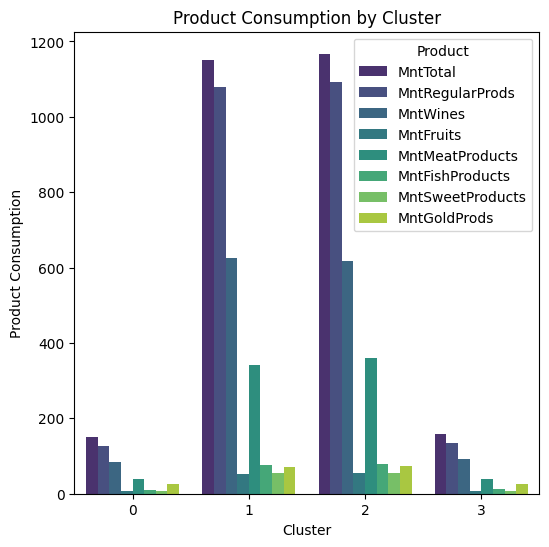

In [82]:
melted_data = pd.melt(mean_data, id_vars="Cluster", var_name="Product", value_name="Consumption")
plt.figure(figsize=(6,6))
sns.barplot(x="Cluster", y="Consumption", hue="Product", data=melted_data, ci=None, palette="viridis")
plt.title("Product Consumption by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Product Consumption")
plt.xticks(rotation=0)
plt.legend(title="Product", loc="upper right")

plt.show()

#Cluster sizes

<ipython-input-85-e3321d154600>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')


Text(0, 0.5, 'MntTotal')

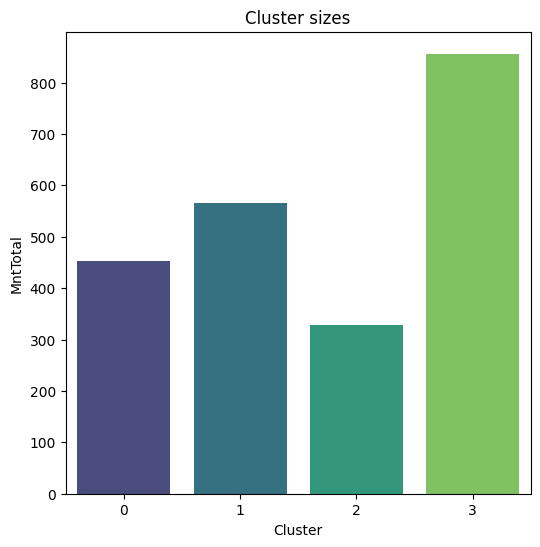

In [85]:
cluster_sizes = data.groupby('Cluster')[['MntTotal']].count().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x='Cluster', y='MntTotal', data=cluster_sizes, palette = 'viridis')
plt.title('Cluster sizes')
plt.xlabel('Cluster')
plt.ylabel('MntTotal')

In [86]:
total_rows = len(data)
cluster_sizes['Share%'] = round(cluster_sizes['MntTotal'] / total_rows*100,0)
cluster_sizes.head()

,Cluster,MntTotal,Share%
0,0,453,21.0
1,1,565,26.0
2,2,328,15.0
3,3,856,39.0


#Income by cluster
Box plot

<ipython-input-87-3643dd62d92f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')


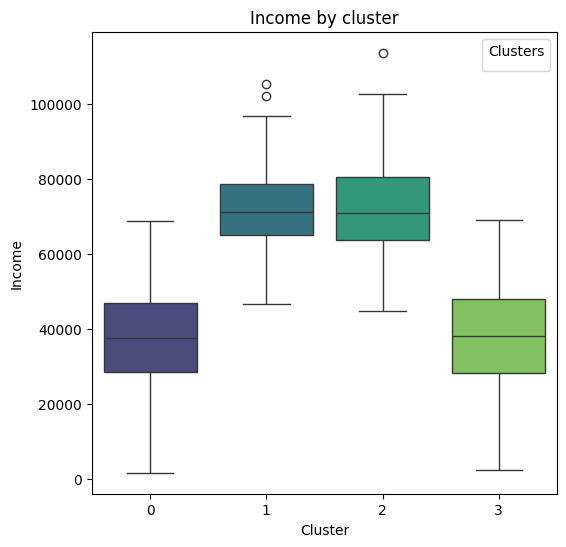

In [87]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.legend(title='Clusters')

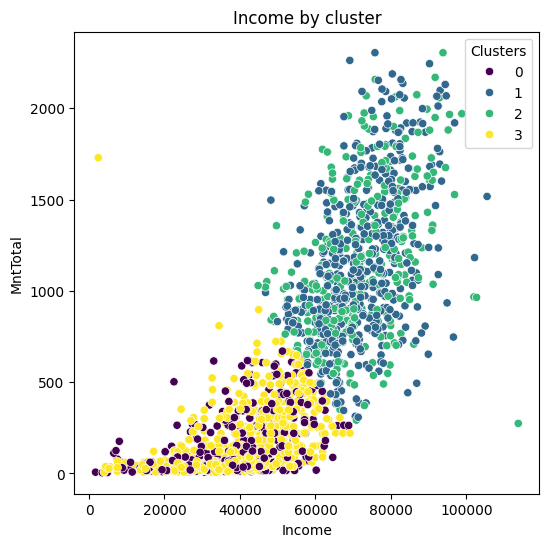

In [88]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='Income', y='MntTotal', data=data, hue = 'Cluster', palette='viridis')
plt.title('Income by cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Clusters')

#In_relationship feature by cluster

<ipython-input-90-8fe882d437c0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')


Text(0, 0.5, 'In_relationship')

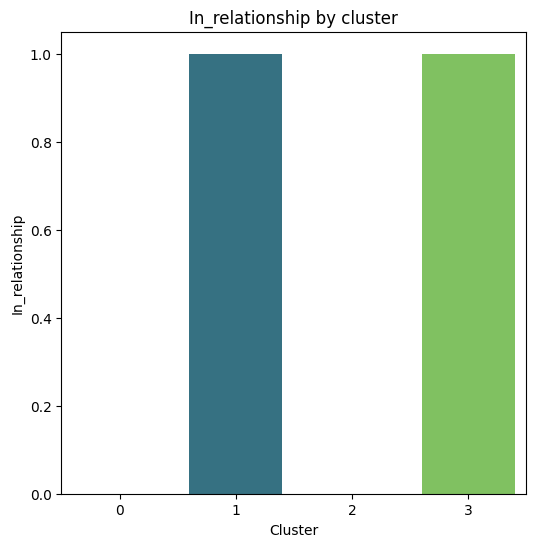

In [90]:
plt.figure(figsize=(6,6))
sns.barplot(x='Cluster', y='In_relationship', data=df, palette='viridis')
plt.title('In_relationship by cluster')
plt.xlabel('Cluster')
plt.ylabel('In_relationship')

#Results
This section contains the results of the K-means clustering analysis, which aimed to identify distinct customer segments based on the total amount of purchases they made (MntTotal). The analysis utilised 'Income' and 'In_relationship' features.

#Optimal number of clusters = 4
The Elbow Method and Silhouette Analysis suggested 4 clusters (k=4). The elbow method highlighted the number of 4 or 5 clusters as a reasonable number of clusters. The silhouette score analysis revealed a peak silhouette score for k=4.

#Cluster Characteristics

Cluster 0: High value customers in relationship (either married or together)
This cluster represents 26% of the customer base
These customers have high income and they are in a relationship

Cluster 1: Low value single customers¶
This cluster represents 21% of the customer base
These customers have low income and they are single

Cluster 2: High value single customers
This cluster represents 15% of the customer base
These customers have high income and they are single

Cluster 3: Low value customers in relationship
This cluster represents 39% of the customer base
These customers have low income and they are in a relationship

#Recommendations
Based on the clusters, tailored marketing strategies can be created. Customers from these segments will have different interests and product preferences.

#Marketing Strategies for Each Cluster
Cluster 0: High value customers in relationship (either married or together)
Preliminary analysis showed that high income customers buy more wines and fruits.
A tailored campaign to promote high quality wines may bring good results.
This cluster contains customers in relationship, family-oriented promo-images should be quite effective for this audience.
#Cluster 1: Low value single customers
Promos with discounts and coupons may bring good results for this targeted group.
Loyalty program may stimulate these customers to purchase more often.
#Cluster 2: High value single customers
Similar to the Cluster 0, these customers buy a lot of wines and fruits.
This cluster contains single customers. Promo images with friends, parties or single trips may be more efficient for single customers
#Cluster 3: Low value customers in relationship
This cluster has the highest percentage of our customers (39%).
Family offers and discounts may influence these customers to make more purchases
Opportunities for the further analysis
Further exploration on how children influence on the consumed products
Further analysis on the influence of education
analysis of frequent buyers
Analysis of sales channels, e.g. store, website, etc.
Analysis of the response to the marketing campaigns
It would be great to add gender data to the dataset
Test different clustering algorithms